### Create directory and upload urls file into your server

In [1]:
from fastai import *
from fastai.vision import *

## Download images

In [2]:
# Data Hirerachy, want to build two classifier, first only classify igneous/sedimentary/metamorphic, second will classify which rock type it is, ie. granite/non-granite/whateveritis....
# I get the hirerachy from https://geology.com/rocks/ and scrape image from google
# source 

In [187]:
# source https://geology.com/rocks/
search_dict={'Igneous Rock':[
'Andesite',
'Basalt',
'Dacite',
'Quartz',
'Diorite',
'Gabbro',
'Granite',
'Obsidian',
'Pegmatite',
'Peridotite',
'Pumice',
'Rhyolite',
'Scoria',
'Tuff',
'Unakite ',
],

'Metamorphic Rock':[

'Amphibolite',
'Gneiss',
'Gneiss',
'Hornfels',
'Lapis Lazuli',
'Marble',
'Mariposite',
'Novaculite',
'Phyllite',
'Quartzite ',
'Schist',
'Skarn',
'Slate',
'Soapstone ',
]
 ,
 
'Sedimentary Rock':
[
'Breccia',
'Caliche',
'Caliche',
'Chert',
'Coal Rock',
'Conglomerate ',
'Diatomite',
'Dolomite',
'Flint',
'Iron Ore',
'Limestone',
'Oil Sands',
'Rock Salt',
'Sandstone',
'Shale',
'Siltstone',]
}

In [188]:
google_image_base_url = 'https://www.google.com/search?tbm=isch&q='

In [189]:
import requests
from bs4 import BeautifulSoup
import urllib
import json

In [190]:
def get_page(url):
    
    page = requests.request('GET', url, headers=header)
    header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"
    }
    # soup = get_soup(search_str,header)
    
    return page

In [191]:
def extract_text(x):
    return dict(json.loads(x.text))['ou']

In [192]:
def get_images_urls(page):
    soup = BeautifulSoup(page.content)
    urls = soup.select('.rg_di .rg_meta')
    list(map(extract_text, urls))

In [199]:
for i ,j in enumerate(search_dict.items()):
    print(i,j)

0 ('Igneous Rock', ['Andesite', 'Basalt', 'Dacite', 'Quartz', 'Diorite', 'Gabbro', 'Granite', 'Obsidian', 'Pegmatite', 'Peridotite', 'Pumice', 'Rhyolite', 'Scoria', 'Tuff', 'Unakite '])
1 ('Metamorphic Rock', ['Amphibolite', 'Gneiss', 'Gneiss', 'Hornfels', 'Lapis Lazuli', 'Marble', 'Mariposite', 'Novaculite', 'Phyllite', 'Quartzite ', 'Schist', 'Skarn', 'Slate', 'Soapstone '])
2 ('Sedimentary Rock', ['Breccia', 'Caliche', 'Caliche', 'Chert', 'Coal Rock', 'Conglomerate ', 'Diatomite', 'Dolomite', 'Flint', 'Iron Ore', 'Limestone', 'Oil Sands', 'Rock Salt', 'Sandstone', 'Shale', 'Siltstone'])


In [200]:
def get_search_list(search_dict):
    
    search_dict = []
    
    for i, key, keywords_list in enumerate(search_dict.items()):
        tmp = keywords_list[i]
        tmp_list = keywords_list.copy()
        tmp_list.remove(tmp_list[i])
        
        search_string = tmp + ' -' + ' -'.join([f'"{keyword}"' for keyword in tmp_list]) + f':{key}' # to make precise search, filter unwanted result, and give good context
        search_list.append(search_string)
    return search_list

In [204]:
get_search_list(search_dict)

AttributeError: 'list' object has no attribute 'items'

In [153]:
def search_string_from_list():
    
    return str

In [148]:
def extract_text(x):
    return dict(json.loads(x.text))['ou']

In [149]:
urls = soup.select('.rg_di .rg_meta')

In [150]:
url = urls[0]

In [51]:
??download_images

Signature: download_images(urls: Collection[str], dest: Union[pathlib.Path, str], max_pics: int = 1000, max_workers: int = 8)
Source:   
def download_images(urls:Collection[str], dest:PathOrStr, max_pics:int=1000, max_workers:int=8):
    "Download images listed in text file `urls` to path `dest`, at most `max_pics`"
    urls = open(urls).read().strip().split("\n")[:max_pics]
    dest = Path(dest)
    dest.mkdir(exist_ok=True)

    if max_workers:
        with ProcessPoolExecutor(max_workers=max_workers) as ex:
            futures = [ex.submit(download_image, url, dest/f"{i:08d}.jpg")
                       for i,url in enumerate(urls)]
            for f in progress_bar(as_completed(futures), total=len(urls)): pass
    else:
        for i,url in enumerate(progress_bar(urls)):
            download_image(url, dest/f"{i:08d}.jpg")
File:      ~/fastai/fastai/vision/data.py
Type:      function


In [154]:
classes = ['flatrack','general','opentop','refrigerated']
path = Path('data/rocks')

# Data Scraping 
Images are scraped from Google Image. 
download_images() Credit to Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In [99]:
for class_name in classes:
    folder = class_name
    file = f'{class_name}.txt'
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    print(file)
    download_images(path/file, dest, max_pics=200)

flatrack.txt


Error http://www.wanhai.com/images/whl_www/fr.jpg 'content-length'
Error https://images3.sw-cdn.net/product/picture/710x528_8167034_6248570_1495868442.jpg 'content-length'
Error https://2abc8o2fsv0b15m651231ryl-wpengine.netdna-ssl.com/wp-content/uploads/2013/11/40ft-flat-rack-container-Gateway-Container-Sales1.jpg 'content-length'
Error http://www.shippingcontainers24.com/wp-content/uploads/2011/11/flatrack_container.jpg HTTPConnectionPool(host='www.shippingcontainers24.com', port=80): Max retries exceeded with url: /wp-content/uploads/2011/11/flatrack_container.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fae30d9fcc0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
Error http://www.carucontainers.com/imgupload/container_pictures/20ftflatrack.jpg 'content-length'
Error x-raw-image:///64cadf0e0eb498537f4de2a31146b570dd56d89539cc127c29af5fbf8bd195aa No connection adapters were found for 'x-raw-image:///64cadf

Process ForkProcess-572:
Process ForkProcess-565:
Process ForkProcess-566:
Process ForkProcess-568:
Process ForkProcess-567:
Process ForkProcess-571:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    sel

KeyboardInterrupt: 

Good! Let's take a look at some of our pictures then.

In [100]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

flatrack


/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


image file is truncated (3 bytes not processed)
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000008.jpg'
image file is truncated (8 bytes not processed)
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000161.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000010.jpg'
image file is truncated (1 bytes not processed)
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000069.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000146.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000128.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000163.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000181.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000197.jpg'
image file is truncated (37 

/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


opentop


refrigerated


[Errno 21] Is a directory: '/home/mediumnok/fastaiv3/data/containers/refrigerated/.ipynb_checkpoints'


/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


## View data

In [101]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [102]:
data.classes

['flatrack', 'general', 'opentop', 'refrigerated']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


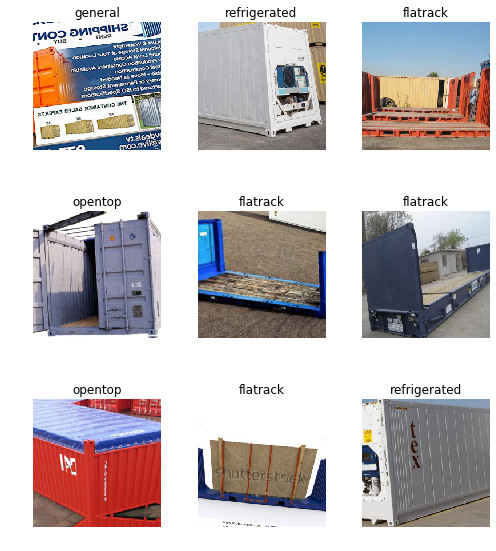

In [103]:
data.show_batch(rows=3, figsize=(7,8))

In [104]:
data.classes, data.c

(['flatrack', 'general', 'opentop', 'refrigerated'], 4)

## Train model

In [42]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [43]:
learn.fit_one_cycle(4)

Total time: 00:52
epoch  train_loss  valid_loss  error_rate
1      1.537907    0.939113    0.378205    (00:13)
2      1.139533    0.657500    0.256410    (00:12)
3      0.927471    0.612842    0.256410    (00:13)
4      0.789356    0.615669    0.262821    (00:13)



In [44]:
learn.save('stage-1-containers')

In [45]:
learn.unfreeze()

In [46]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fae3a6f21e0>
Traceback (most recent call last):
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


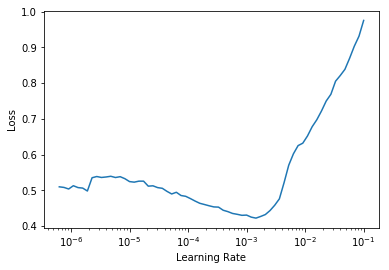

In [47]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 00:27
epoch  train_loss  valid_loss  error_rate
1      0.478554    0.585755    0.269231    (00:13)
2      0.490595    0.578649    0.243590    (00:13)



In [52]:
learn.save('stage-2-containers')

In [53]:
learn.load('stage-2-containers')

## Interpretation

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

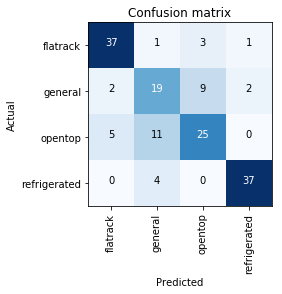

In [55]:
interp.plot_confusion_matrix()

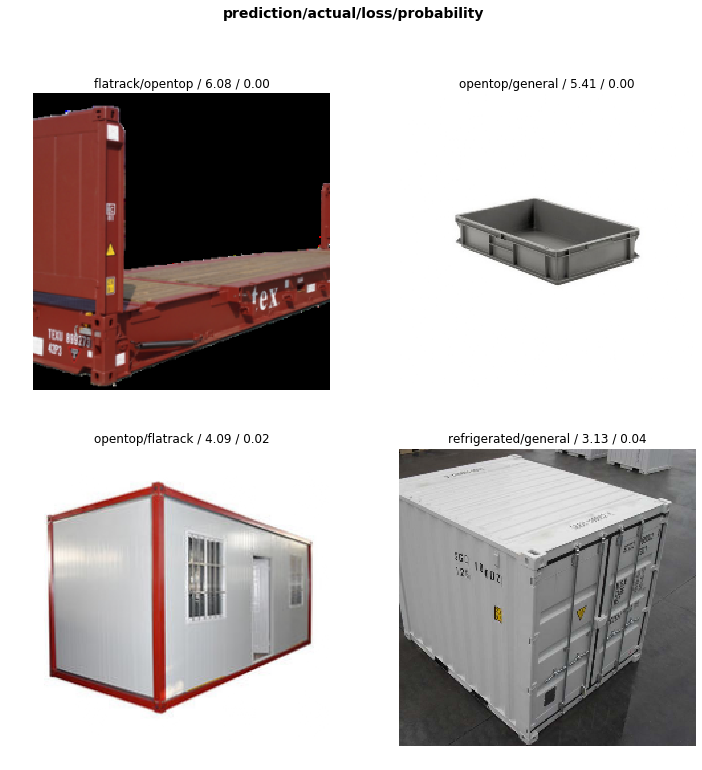

In [56]:
interp.plot_top_losses(4)

#### You can see for the first exmaple, the model is quite sure it is a regrigerated container, but the label is actually Highcube. In this case, the model is actually correct and it is a mis-label

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [57]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

Now we can pass in these paths to our widget.

In [58]:
fd = FileDeleter(file_paths=top_loss_paths)

Button(button_style='primary', description='Confirm', style=ButtonStyle())

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

## Putting your model in production

In [59]:
data.classes

['flatrack', 'general', 'opentop', 'refrigerated']

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [60]:
# fastai.defaults.device = torch.device('cpu')

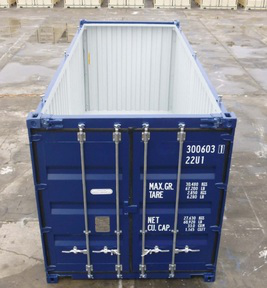

In [61]:
img = open_image(path/'opentop'/'00000039.jpg')
img

In [74]:
classes = ['flatrack', 'general', 'opentop', 'refrigerated']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2-containers')

In [72]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'opentop'

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [88]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [87]:
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:12
epoch  train_loss  valid_loss  error_rate     
1      19.205343   80275072.000000  0.737179    (00:12)



### Learning rate (LR) too low

In [89]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [90]:
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:04
epoch  train_loss  valid_loss  error_rate
1      1.846892    1.460822    0.692308    (00:12)
2      1.822263    1.449666    0.685897    (00:12)
3      1.818573    1.452975    0.660256    (00:12)
4      1.806075    1.466667    0.653846    (00:13)
5      1.804038    1.476455    0.679487    (00:13)



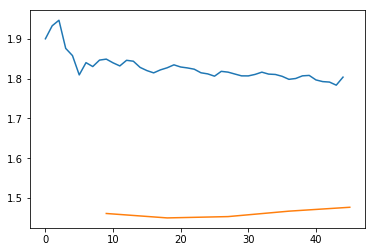

In [91]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [105]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [106]:
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      1.271487    0.711475    0.280255    (00:14)



### Too many epochs

In [107]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [108]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [111]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 07:22
epoch  train_loss  valid_loss  error_rate
1      1.517631    1.572828    0.802288    (00:12)
2      1.546593    1.550419    0.826797    (00:11)
3      1.545142    1.528509    0.815359    (00:11)
4      1.478895    1.492109    0.790850    (00:10)
5      1.433474    1.442667    0.728758    (00:10)
6      1.337803    1.386668    0.679739    (00:10)
7      1.270900    1.327418    0.642157    (00:11)
8      1.200847    1.269937    0.591503    (00:11)
9      1.121168    1.216577    0.545752    (00:10)
10     1.029964    1.176654    0.519608    (00:11)
11     0.959061    1.140666    0.488562    (00:11)
12     0.887489    1.114502    0.480392    (00:10)
13     0.824836    1.097068    0.470588    (00:10)
14     0.767771    1.091737    0.464052    (00:11)
15     0.717235    1.086249    0.465686    (00:11)
16     0.665047    1.078649    0.449346    (00:10)
17     0.620755    1.081273    0.446078    (00:11)
18     0.578923    1.082510    0.444444    (00:11)
19     0.551266    1.0